<H1> Importing and Exploring Provided Datasets </H1>

<H4> Import the necessary packages.</H4>

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

*Bring in the file names for easy access.*

In [7]:
zippedData = ['bom.movie_gross.csv.gz','imdb.name.basics.csv.gz','imdb.title.akas.csv.gz',
              'imdb.title.basics.csv.gz','imdb.title.crew.csv.gz',
              'imdb.title.principals.csv.gz','imdb.title.ratings.csv.gz',
              'rt.movie_info.tsv.gz','rt.reviews.tsv.gz','tmdb.movies.csv.gz',
              'tn.movie_budgets.csv.gz']

In [8]:
bom_movie_gross = pd.read_csv("zippedData/{}".format(zippedData[0]))
imdb_name = pd.read_csv("zippedData/{}".format(zippedData[1]))
imdb_title_aka = pd.read_csv("zippedData/{}".format(zippedData[2]))
imdb_title_basics = pd.read_csv("zippedData/{}".format(zippedData[3]))
imdb_title_crew = pd.read_csv("zippedData/{}".format(zippedData[4]))
imdb_title_principals = pd.read_csv("zippedData/{}".format(zippedData[5]))
imdb_title_rating = pd.read_csv("zippedData/{}".format(zippedData[6]))
rt_movie_info = pd.read_csv("zippedData/{}".format(zippedData[7]),sep='\t')
df8 = pd.read_csv("zippedData/{}".format(zippedData[8]),sep='\t',encoding='latin1')
tmdb_movies = pd.read_csv("zippedData/{}".format(zippedData[9]))
tn_movie_budget = pd.read_csv("zippedData/{}".format(zippedData[10]))

In this section we combined a few IMDB mini dataframes to make one joint one. Using this dataframe, we were able to explore which genres held the highest ratings in the last 20 years, and which directors have high ratings. 

First, we merged the data sets.

In [80]:
imdb=imdb_title_rating.merge(imdb_title_principals,on='tconst')
imdb=imdb.merge(imdb_title_basics,on='tconst')
imdb=imdb.merge(imdb_name,on='nconst')
imdb=imdb.merge(imdb_title_crew,on='tconst')
imdb.head()

,tconst,averagerating,numvotes,ordering,nconst,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers
0,tt10356526,8.3,31,10,nm8994524,production_designer,NaN,NaN,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962",nm8353804,"nm3057599,nm4179342"
1,tt10356526,8.3,31,1,nm4718369,actor,NaN,"[""Sukh""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Harish Verma,NaN,NaN,actor,"tt3265542,tt7246718,tt8108168,tt3331954",nm8353804,"nm3057599,nm4179342"
2,tt10356526,8.3,31,2,nm10007357,actress,NaN,"[""Raunak""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Roopi Gill,NaN,NaN,actress,"tt8749962,tt9260244,tt8785138",nm8353804,"nm3057599,nm4179342"
3,tt10356526,8.3,31,3,nm8743259,actress,NaN,"[""Jaanpreet""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Rubina Bajwa,NaN,NaN,actress,"tt8125398,tt7897324,tt10081104,tt6476532",nm8353804,"nm3057599,nm4179342"
4,tt10356526,8.3,31,4,nm3760302,actor,NaN,"[""Garry Randhawa""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Amrinder Gill,NaN,NaN,"actor,music_department,soundtrack","tt4846952,tt5569468,tt6882872,tt8749962",nm8353804,"nm3057599,nm4179342"


Next, we pulled the relevant columns, dropped duplicates and dropped mising values.

In [74]:
imdb=imdb[['original_title','genres','start_year','averagerating','category','primary_profession','primary_name']].where(imdb['start_year']>2000)
imdb['original_title'].drop_duplicates(inplace=True)


For the first question, which genres have the highest rating, we pulled the two columns that we needed: average rating and genres. 

In [62]:
imdb_genre_rating=imdb[['genres','averagerating','primary_profession','primary_name']]
imdb_genre_rating.head()

,genres,averagerating,primary_profession,primary_name
0,Romance,8.3,"production_designer,art_department",Kazi Rafik Ali
1,Romance,8.3,actor,Harish Verma
2,Romance,8.3,actress,Roopi Gill
3,Romance,8.3,actress,Rubina Bajwa
4,Romance,8.3,"actor,music_department,soundtrack",Amrinder Gill


Since some of the data in the genre column contained more than one genre, we had to split the column into three seperate columns and then return them into one column.

In [79]:
imdb_genre_rating[["One","Two","Three"]]=imdb_genre_rating.genres.str.split(pat=',', n=- 1, expand=True)
imdb_genre_rating_one=imdb_genre_rating[['One','averagerating']]
imdb_genre_rating_two=imdb_genre_rating[['Two','averagerating']]    
imdb_genre_rating_three=imdb_genre_rating[['Three','averagerating']]
imdb_genre_rating_one=imdb_genre_rating_one.rename(columns={"One":"Genre"})
imdb_genre_rating_two=imdb_genre_rating_two.rename(columns={"Two":"Genre"})
imdb_genre_rating_three=imdb_genre_rating_three.rename(columns={"Three":"Genre"})
genre_rating=pd.concat([imdb_genre_rating_three,imdb_genre_rating_two,imdb_genre_rating_one])
genre_rating=genre_rating[['Genre','averagerating']]
genre_rating.isnull().sum()
genre_rating['Genre'].dropna(inplace=True)


We dropped the genre catergories that weren't technically movies, and the ones that have a very low average rating. 

In [58]:
genre_rating=genre_rating[genre_rating.Genre != 'Music']
genre_rating=genre_rating[genre_rating.Genre != 'Reality-TV']
genre_rating=genre_rating[genre_rating.Genre != 'News']
genre_rating=genre_rating[genre_rating.Genre != 'Game-Show']
genre_rating=genre_rating[genre_rating.Genre != 'Short']
genre_rating=genre_rating[genre_rating.Genre != 'Horror']
genre_rating=genre_rating[genre_rating.Genre != 'Western']
genre_rating=genre_rating[genre_rating.Genre != 'Thriller']
genre_rating=genre_rating[genre_rating.Genre != 'Sci-Fi']
genre_rating=genre_rating[genre_rating.Genre != 'Adult']
genre_rating

,Genre,averagerating
0,None,8.3
1,None,8.3
2,None,8.3
3,None,8.3
4,None,8.3
...,...,...
629585,Documentary,8.6
629594,Documentary,4.3
629595,Documentary,4.3
629596,Documentary,4.3


Next, we plotted the median user rating of each genre.

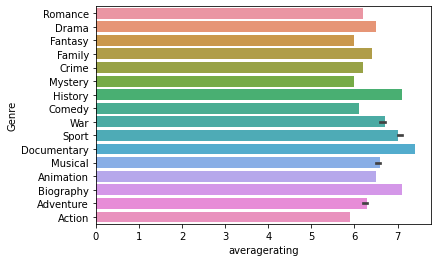

In [53]:
from numpy import median
ax3 = sns.barplot(x="averagerating", y="Genre", data=genre_rating, estimator=median)

Next, we plotted the mean user rating of each genre.

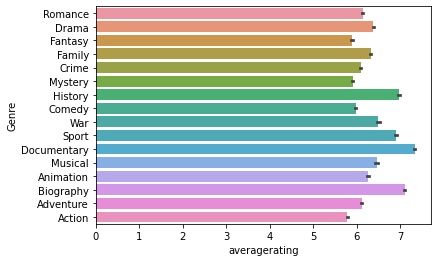

In [54]:
from numpy import mean
ax3 = sns.barplot(x="averagerating", y="Genre", data=genre_rating, estimator=mean)

Next we looked at the overall distribution of the user ratings among the different genres 

Text(0.5, 1.0, 'Distribution of User Rating in Each Genre ')

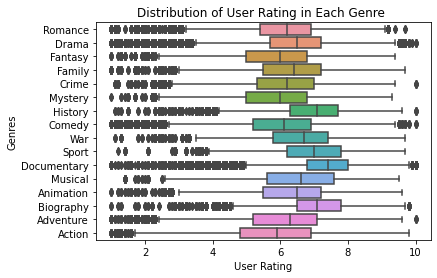

In [35]:
ax= sns.boxplot(x="averagerating",y="Genre",data=genre_rating)
ax.set_xlabel("User Rating")
ax.set_ylabel("Genres")
ax.set_title("Distribution of User Rating in Each Genre ")

In this section we looked at which directors had the highest ratings. 

In [76]:
imdb_job=imdb[['primary_profession','primary_name','averagerating']]
imdb_job[['Director','Director2','Director3']]=imdb_job.primary_profession.str.split(pat=',', n=- 1, expand=True)
imdb_job_director=imdb_job[imdb_job['primary_profession'].str.contains('director')]
imdb_job_director_name=imdb_job_director[['averagerating','primary_name']]
imdb_job_director_name=imdb_job_director_name.groupby(['primary_name']).mean().sort_values('averagerating',ascending=False)
imdb_job_director_name.head(10)


C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,averagerating
primary_name,
Loreto Di Cesare,10.0
Ivana Diniz,10.0
Emre Oran,10.0
Chad Carpenter,10.0
Michiel Brongers,10.0
Masahiro Hayakawa,10.0
Aaron Barrett,10.0
Andrew Jezard,9.9
Raphael Sbarge,9.9
